In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('../../cece_data/df2015_16.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', "_")
df.head()

,fips,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,...,total_votes,target,state,county_[2],population(2010),land_areami²,water_areami²,total_areami²,latitude,longitude
0,6001,0.962155,3308,39861,80961,20969,75187,39042,24187,47611,...,610764.0,0,CA,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330
1,6005,0.870878,195,820,568,165,1884,525,188,523,...,16489.0,1,CA,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385
2,6007,0.902701,3249,4682,5355,1625,12125,2596,1620,4508,...,86711.0,1,CA,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191
3,6009,0.884900,496,1662,1326,373,1819,922,201,661,...,21455.0,1,CA,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511
4,6011,0.997456,2425,356,958,164,620,463,45,375,...,6212.0,1,CA,Colusa,21419,1150.731,5.630,1156.361,39.17773,-122.23756


In [4]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [5]:
df['pop_density'] = df['population(2010)']/df['total_areami²']

In [6]:
df['pop_density']

0      1838.815918
1        62.861000
2       131.176396
3        43.954878
4        18.522762
          ...     
474       0.417291
475       1.366692
476       3.325280
477       1.792500
478      13.249340
Name: pop_density, Length: 479, dtype: float64

In [7]:
df.iloc[0, 29:44]

ed_no_schooling_completed    25753
ed_nursery_school              148
ed_kindergarten                253
ed_1st_grade                   768
ed_2nd_grade                  1936
ed_3rd_grade                  4217
ed_4th_grade                  3130
ed_5th_grade                  4937
ed_6th_grade                 21621
ed_7th_grade                  4847
ed_8th_grade                 10795
ed_9th_grade                 14180
e_10th_grade                 12027
ed_11th_grade                14729
ed_12th_grade_no_diploma     23248
Name: 0, dtype: object

In [8]:
row_sums = []
for row in df.index:
    row_sums.append(df.iloc[row, 29:44].sum())

In [9]:
df['sums'] = row_sums

In [10]:
df['percent_no_hs'] = df['sums']/df['ed_total']

In [11]:
df.head()

,fips,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,...,county_[2],population(2010),land_areami²,water_areami²,total_areami²,latitude,longitude,pop_density,sums,percent_no_hs
0,6001,0.962155,3308,39861,80961,20969,75187,39042,24187,47611,...,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330,1838.815918,142589,0.130553
1,6005,0.870878,195,820,568,165,1884,525,188,523,...,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385,62.861000,3337,0.116369
2,6007,0.902701,3249,4682,5355,1625,12125,2596,1620,4508,...,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191,131.176396,17192,0.120145
3,6009,0.884900,496,1662,1326,373,1819,922,201,661,...,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511,43.954878,2812,0.083569
4,6011,0.997456,2425,356,958,164,620,463,45,375,...,Colusa,21419,1150.731,5.630,1156.361,39.17773,-122.23756,18.522762,4231,0.318216


In [12]:
df['percent_no_hs']

0      0.130553
1      0.116369
2      0.120145
3      0.083569
4      0.318216
         ...   
474    0.192152
475    0.163808
476    0.212963
477    0.141601
478    0.467203
Name: percent_no_hs, Length: 479, dtype: float64

In [13]:
df.head()


,fips,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,...,county_[2],population(2010),land_areami²,water_areami²,total_areami²,latitude,longitude,pop_density,sums,percent_no_hs
0,6001,0.962155,3308,39861,80961,20969,75187,39042,24187,47611,...,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330,1838.815918,142589,0.130553
1,6005,0.870878,195,820,568,165,1884,525,188,523,...,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385,62.861000,3337,0.116369
2,6007,0.902701,3249,4682,5355,1625,12125,2596,1620,4508,...,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191,131.176396,17192,0.120145
3,6009,0.884900,496,1662,1326,373,1819,922,201,661,...,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511,43.954878,2812,0.083569
4,6011,0.997456,2425,356,958,164,620,463,45,375,...,Colusa,21419,1150.731,5.630,1156.361,39.17773,-122.23756,18.522762,4231,0.318216


In [14]:
 25753+148+253+768+1936+4217+3130+4937+21621+4847+10795+14180+12027+14729+23248

142589

In [15]:
df.iloc[0,:].to_list()

[6001,
 0.9621547064881564,
 3308,
 39861,
 80961,
 20969,
 75187,
 39042,
 24187,
 47611,
 133336,
 174656,
 70809,
 40358,
 27847,
 362591,
 126123,
 167052,
 50316,
 72050,
 1487408,
 708558,
 184883,
 9813,
 439055,
 13760,
 131339,
 37.1,
 1092189,
 25753,
 148,
 253,
 768,
 1936,
 4217,
 3130,
 4937,
 21621,
 4847,
 10795,
 14180,
 12027,
 14729,
 23248,
 34052.0,
 70100,
 848232,
 13753,
 68307,
 73763,
 1573351,
 2911,
 1584983,
 2016,
 'PRESIDENT',
 'CA',
 514842.0,
 95922.0,
 610764.0,
 0,
 'CA',
 'Alameda',
 1510271,
 739.0169999999998,
 82.311,
 821.328,
 37.64808,
 -121.9133,
 1838.8159176358288,
 142589,
 0.13055341154324024]

In [16]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [17]:
#df = df.drop(['ed_total', 'ed_no_schooling_completed', 'ed_nursery_school','ed_kindergarten', 'ed_1st_grade', 'ed_2nd_grade', 'ed_3rd_grade','ed_4th_grade', 'ed_5th_grade', 
#'ed_6th_grade', 'ed_7th_grade','ed_8th_grade', 'ed_9th_grade', 'e_10th_grade', 'ed_11th_grade',
#'ed_12th_grade_no_diploma', 'sums', 'fips'], axis=1)

In [18]:
#df = df.drop(['office','state','dem_votes','rep_votes', 'year','latitude','longitude'], axis=1)

In [19]:
df['unemp_rate'] = df['unemployed_pop_16_years_and_over']/df['in_civilian_labor_force']

In [20]:
insurance_sums = []
for row in df.index:
    insurance_sums.append(df.iloc[row, 47:51].sum())

In [21]:
df['insurance_sums'] = insurance_sums

In [22]:
df['uninsured_rate'] = df['insurance_sums']/df['health_insurance_total']

In [23]:
df['percent_white'] = df['white']/df['population_of_one_race_total']

In [24]:
df['percent_black'] = df['black_or_african_american']/df['population_of_one_race_total']

In [25]:
df['percent_american_indian_and_alaska_native'] = df['american_indian_and_alaska_native']/df['population_of_one_race_total']

In [26]:
df['percent_pacific_islander'] = df['native_hawaiian_and_other_pacific_islander']/df['population_of_one_race_total']

In [27]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [28]:
df = df.drop(['unemployed_pop_16_years_and_over','in_civilian_labor_force','ed_total', 'ed_no_schooling_completed', 'ed_nursery_school','ed_kindergarten', 'ed_1st_grade', 
'ed_2nd_grade', 'ed_3rd_grade','ed_4th_grade', 'ed_5th_grade'],axis=1)


In [29]:
df = df.drop(['ed_6th_grade', 'ed_7th_grade','ed_8th_grade', 'ed_9th_grade', 'e_10th_grade', 'ed_11th_grade'],axis=1)

In [30]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [31]:
df = df.drop(['year','latitude','longitude','population_of_one_race_total', 'white', 'black_or_african_american',
'american_indian_and_alaska_native', 'asian_alone','native_hawaiian_and_other_pacific_islander',
'population_of_one_race_some_other_race'], axis=1)

In [32]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'ed_12th_grade_no_diploma', 'median_income',
       'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage',

In [33]:
df = df.drop(['fips'], axis=1)

In [34]:
df = df.drop(['ed_12th_grade_no_diploma','sums'], axis=1)

In [35]:
df =df.drop(['insurance_sums','office','state'],axis=1)

In [36]:
df.columns

Index(['vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'median_income',
       'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage', 'health_insurance_total',
       '6

In [37]:
#df.to_csv('../../cece_data/df1516features.csv')

In [38]:
df.target

0      0
1      1
2      1
3      1
4      1
      ..
474    1
475    1
476    1
477    1
478    0
Name: target, Length: 479, dtype: int64

In [39]:
df.corr()

,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,total_scientific_administrative_and_waste_management_services,...,water_areami²,total_areami²,pop_density,percent_no_hs,unemp_rate,uninsured_rate,percent_white,percent_black,percent_american_indian_and_alaska_native,percent_pacific_islander
vax_percentage,1.000000,-0.073076,-0.125160,-0.088834,-0.110737,-0.129251,-0.100892,-0.110895,-0.126387,-0.125032,...,-0.133227,-0.173128,-0.112116,0.105613,-0.098406,-0.042839,0.095078,0.011118,-0.290494,-0.202057
total_agriculture,-0.073076,1.000000,0.574984,0.465882,0.515584,0.500521,0.494365,0.336268,0.436736,0.459934,...,0.148757,0.358491,0.328905,0.123401,0.117436,0.058527,-0.291637,0.037278,0.049445,0.133363
total_construction,-0.125160,0.574984,1.000000,0.938455,0.972815,0.976904,0.963218,0.867019,0.947659,0.957741,...,0.258444,0.259643,0.720347,-0.039856,0.085442,0.012679,-0.395668,0.160480,-0.026760,0.143545
total_manufacturing,-0.088834,0.465882,0.938455,1.000000,0.963461,0.957516,0.943095,0.924451,0.945615,0.970140,...,0.250928,0.221713,0.715805,-0.050872,0.068066,-0.044312,-0.387716,0.115844,-0.029548,0.145861
total_wholesale_trade,-0.110737,0.515584,0.972815,0.963461,1.000000,0.987175,0.977163,0.929439,0.964294,0.970228,...,0.269312,0.251673,0.697838,-0.032516,0.080979,-0.002776,-0.379999,0.141586,-0.028865,0.133434
total_retail_trade,-0.129251,0.500521,0.976904,0.957516,0.987175,1.000000,0.977563,0.916150,0.980196,0.982698,...,0.289771,0.270459,0.739162,-0.058872,0.098616,-0.012547,-0.410524,0.164387,-0.030869,0.154308
transportation_warehousing_utilities,-0.100892,0.494365,0.963218,0.943095,0.977163,0.977563,1.000000,0.894954,0.959866,0.958879,...,0.269214,0.274030,0.706326,-0.030721,0.092997,0.004112,-0.387256,0.169424,-0.029976,0.134956
total_information,-0.110895,0.336268,0.867019,0.924451,0.929439,0.916150,0.894954,1.000000,0.898895,0.925088,...,0.254318,0.176635,0.606107,-0.037333,0.054714,-0.026309,-0.339343,0.093005,-0.021658,0.139476
total_finance_and_real_estate,-0.126387,0.436736,0.947659,0.945615,0.964294,0.980196,0.959866,0.898895,1.000000,0.982381,...,0.287540,0.194569,0.797182,-0.079558,0.069897,-0.028884,-0.406009,0.170820,-0.039882,0.142795
total_scientific_administrative_and_waste_management_services,-0.125032,0.459934,0.957741,0.970140,0.970228,0.982698,0.958879,0.925088,0.982381,1.000000,...,0.283842,0.202735,0.778285,-0.066175,0.070061,-0.028952,-0.421435,0.152320,-0.033783,0.168110


<AxesSubplot:>

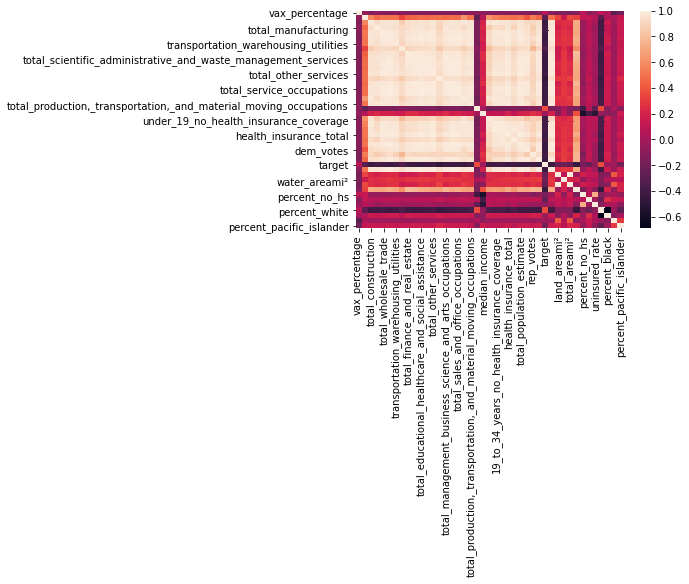

In [40]:
sns.heatmap(df.corr())

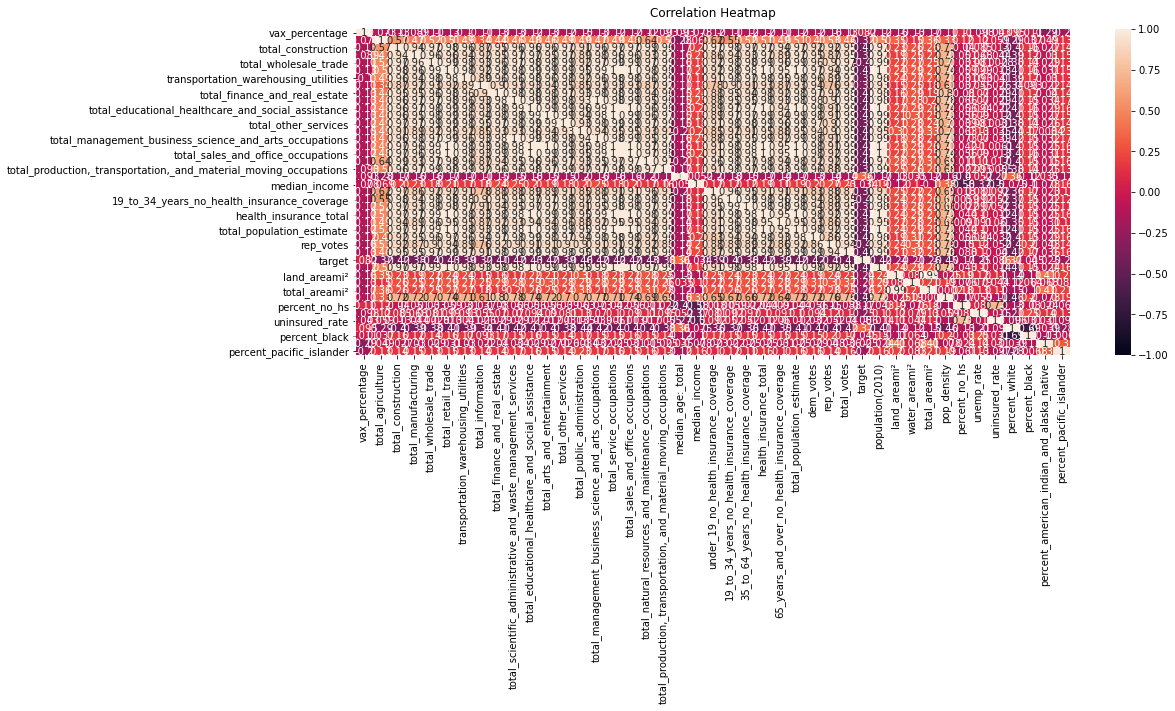

In [41]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [42]:
feature_list = df.columns

In [43]:
df.columns

Index(['vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'median_income',
       'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage', 'health_insurance_total',
       '6

In [44]:
dfnum = df.select_dtypes(exclude=['object'])

In [45]:
#'ed_nursery_school','ed_kindergarten','ed_1st_grade','ed_2nd_grade','ed_3rd_grade','ed_4th_grade','ed_5th_grade'        

In [46]:
X = dfnum.drop('target', axis=1)
y = df['target']

In [47]:
#first train-test-split
X_t, X_test, y_t, y_test = train_test_split(X,y, random_state=42)

In [48]:
#second train-test-split for cross val
X_train, X_val, y_train, y_val = train_test_split(X_t,y_t, random_state=42)

In [49]:
#Handling missing cece_data using 
imputer = SimpleImputer()

In [50]:
#fitting on training cece_data
imputer.fit(X_train)
#transform training and validation cece_data
X_train_imputed = imputer.transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [51]:
#turned imputed cece_data into cece_dataframes
X_train_imputed_df = pd.cece_dataFrame(X_train_imputed, columns=X_train.columns)
X_val_imputed_df = pd.cece_dataFrame(X_val_imputed, columns=X_val.columns)

In [52]:
#scaling cece_data
scaler = StandardScaler()

In [53]:
scaler.fit(X_train_imputed_df)

StandardScaler()

In [54]:
#transform train and validation cece_data 
X_train_scaled = scaler.transform(X_train_imputed_df)
X_val_scaled = scaler.transform(X_val_imputed_df)

In [55]:
#create cece_dataframes of scaled train and val cece_data
X_train_scaled_df = pd.cece_dataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.cece_dataFrame(X_val_scaled, columns=X_val.columns)

In [56]:
#sanity check
X_train_scaled_df.head()

,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,total_scientific_administrative_and_waste_management_services,...,water_areami²,total_areami²,pop_density,percent_no_hs,unemp_rate,uninsured_rate,percent_white,percent_black,percent_american_indian_and_alaska_native,percent_pacific_islander
0,0.672131,-0.259601,-0.306590,-0.219231,-0.268095,-0.293711,-0.220598,-0.267711,-0.262555,-0.274573,...,-0.312044,-0.213972,-0.279042,-0.970689,0.562727,-1.400151,1.271743,-0.854583,-0.680308,-0.308656
1,0.473674,-0.428987,-0.357129,-0.232515,-0.314539,-0.345293,-0.293950,-0.284656,-0.303875,-0.307215,...,-0.332271,-0.527792,-0.294928,-0.209116,-0.614744,0.119666,1.151580,-0.882676,-0.465571,-0.532172
2,0.514528,-0.315166,-0.099233,0.241746,-0.107203,-0.042172,-0.070320,-0.068337,-0.080644,-0.057591,...,-0.279923,-0.379130,0.254730,-1.012646,0.244515,-1.365310,-1.001404,1.515528,-0.392238,-0.410778
3,0.508937,0.800333,-0.192729,-0.194566,-0.172411,-0.143200,-0.203828,-0.159119,-0.192895,-0.187823,...,-0.245207,0.254846,-0.242456,-0.112446,-1.074321,0.230698,0.199501,-0.340855,-0.276055,-0.232868
4,0.834890,0.185524,-0.386411,-0.281926,-0.323322,-0.367581,-0.294971,-0.306271,-0.304881,-0.307458,...,-0.307762,-0.012822,-0.360050,1.831635,0.812424,0.116537,0.191649,-0.849762,0.628896,0.766104


In [57]:
#sanity check again
X_val_scaled_df.head()

,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,total_scientific_administrative_and_waste_management_services,...,water_areami²,total_areami²,pop_density,percent_no_hs,unemp_rate,uninsured_rate,percent_white,percent_black,percent_american_indian_and_alaska_native,percent_pacific_islander
0,0.379767,-0.413751,-0.353635,-0.206959,-0.284596,-0.326264,-0.260483,-0.283100,-0.283533,-0.291290,...,-0.315365,-0.310605,-0.291511,-0.729057,-0.145157,-1.366820,0.666131,-0.244827,-0.503688,0.625426
1,0.714340,-0.509647,-0.384850,-0.308251,-0.336098,-0.374848,-0.311669,-0.309384,-0.312139,-0.313244,...,-0.311054,-0.575420,-0.321146,-0.228831,0.785450,-1.243149,0.444399,0.281383,-0.635305,-0.532172
2,0.890384,-0.431974,-0.400830,-0.311815,-0.322257,-0.375111,-0.315825,-0.306790,-0.319926,-0.317385,...,-0.284070,-0.190952,-0.381789,0.531043,-0.507884,-0.043454,0.268203,-0.030143,0.639767,-0.532172
3,0.083128,-0.461550,-0.385073,-0.315825,-0.344615,-0.373650,-0.316773,-0.302813,-0.309278,-0.303256,...,-0.149186,-0.374994,-0.349700,0.314196,0.505025,-0.934884,-2.513313,4.025670,-0.418530,-0.532172
4,0.503639,-0.428987,-0.384850,-0.279253,-0.319995,-0.372151,-0.311523,-0.295550,-0.314046,-0.312635,...,-0.330241,-0.576716,-0.330520,-0.763266,-0.185244,-1.626919,1.267507,-0.920560,-0.523765,0.415096


In [58]:
#create a function to build the various models needed in the remainder of this notebook

def modeling_function(model, X_train, y_train, X_val, y_val):
    #fit model to training cece_data
    model.fit(X_train_scaled_df, y_train)
    
    #make predictions on train and validation
    train_preds = model.predict(X_train_scaled_df)
    val_preds = model.predict(X_val_scaled_df)
    
    #output metrics
    print(model, ': Training Recall', recall_score(y_train, train_preds))
    print(model, ': Validation Recall', recall_score(y_val, val_preds))
    print('Training Accuracy', accuracy_score(y_train, train_preds))
    print('Validation Accuracy', accuracy_score(y_val, val_preds))
    print('Training Precicion', precision_score(y_train, train_preds))
    print('Validation Precision', precision_score(y_val, val_preds))
    print('Training F1', f1_score(y_train, train_preds))
    print('Validation F1', f1_score(y_val, val_preds))
    
    #return fitted model
    return model

In [59]:
#instantiate log reg
logreg = LogisticRegression(solver ='liblinear')

In [60]:
#run logreg through function to fit and model
logreg_fitted = modeling_function(logreg, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

LogisticRegression(solver='liblinear') : Training Recall 0.9868421052631579
LogisticRegression(solver='liblinear') : Validation Recall 1.0
Training Accuracy 0.9479553903345725
Validation Accuracy 0.9666666666666667
Training Precicion 0.9533898305084746
Validation Precision 0.9629629629629629
Training F1 0.9698275862068965
Validation F1 0.9811320754716981


In [61]:
logreg_coefs = pd.cece_dataFrame(np.abs(logreg.coef_.T), columns=['coefficient'], index=X_train_scaled_df.columns)
logreg_coefs.sort_values(by='coefficient')

,coefficient
total_natural_resources_and_maintenance_occupations,0.010509
35_to_64_years_no_health_insurance_coverage,0.014149
pop_density,0.022524
total_public_administration,0.040370
total_retail_trade,0.053820
total_construction,0.074833
total_sales_and_office_occupations,0.134195
total_other_services,0.138394
total_wholesale_trade,0.138567
19_to_34_years_no_health_insurance_coverage,0.150087


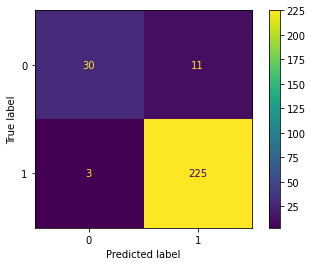

In [62]:
plot_confusion_matrix(logreg_fitted, X_train_scaled_df, y_train)

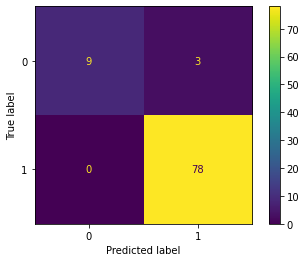

In [63]:
plot_confusion_matrix(logreg_fitted, X_val_scaled_df, y_val)

In [64]:
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=.5)

In [65]:
logreg2_fitted = modeling_function(logreg2, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear') : Training Recall 0.9912280701754386
LogisticRegression(C=0.5, penalty='l1', solver='liblinear') : Validation Recall 0.9743589743589743
Training Accuracy 0.9368029739776952
Validation Accuracy 0.9333333333333333
Training Precicion 0.9377593360995851
Validation Precision 0.95
Training F1 0.9637526652452025
Validation F1 0.9620253164556962


In [66]:
logreg2_coefs = pd.cece_dataFrame(np.abs(logreg2.coef_.T), columns=['coefficient'], index=X_train_scaled_df.columns)
logreg2_coefs.sort_values(by='coefficient')

,coefficient
vax_percentage,0.000000
uninsured_rate,0.000000
percent_no_hs,0.000000
pop_density,0.000000
water_areami²,0.000000
land_areami²,0.000000
population(2010),0.000000
total_votes,0.000000
total_population_estimate,0.000000
65_years_and_over_no_health_insurance_coverage,0.000000


In [67]:
dtc = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [69]:
rfc_fitted = modeling_function(rfc, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

RandomForestClassifier() : Training Recall 1.0
RandomForestClassifier() : Validation Recall 0.9615384615384616
Training Accuracy 1.0
Validation Accuracy 0.9
Training Precicion 1.0
Validation Precision 0.9259259259259259
Training F1 1.0
Validation F1 0.9433962264150944


In [70]:
dtc_fitted = modeling_function(dtc, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2) : Training Recall 0.9824561403508771
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2) : Validation Recall 0.9743589743589743
Training Accuracy 0.9070631970260223
Validation Accuracy 0.8888888888888888
Training Precicion 0.9142857142857143
Validation Precision 0.9047619047619048
Training F1 0.9471458773784355
Validation F1 0.9382716049382716


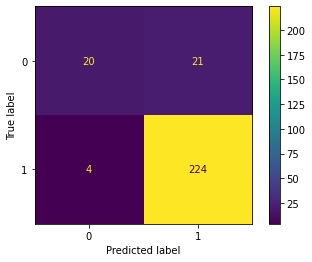

In [71]:
plot_confusion_matrix(dtc_fitted, X_train_scaled_df, y_train)

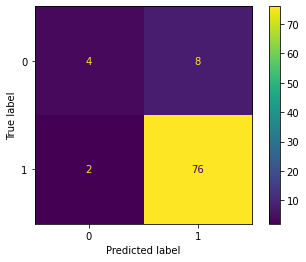

In [72]:
plot_confusion_matrix(dtc_fitted, X_val_scaled_df, y_val)

In [73]:
#create param_grid dictionary
param_grid = {'criterion': ['gini','entropy'],
                'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
                'max_depth': [2,3,4,5,6,7,8,9,10]}

In [74]:
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='recall')

In [75]:
dtc_gs.fit(X_train_scaled_df, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14]},
             scoring='recall')

In [76]:
best_model = dtc_gs.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=12)

In [77]:
X_test_imputed = imputer.transform(X_test)

In [78]:
X_test_scaled = scaler.transform(X_test_imputed)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier()

In [81]:
fitted_knn = modeling_function(knn, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

KNeighborsClassifier() : Training Recall 0.9912280701754386
KNeighborsClassifier() : Validation Recall 0.9871794871794872
Training Accuracy 0.9330855018587361
Validation Accuracy 0.9666666666666667
Training Precicion 0.9338842975206612
Validation Precision 0.9746835443037974
Training F1 0.9617021276595745
Validation F1 0.980891719745223


In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
scaled_pipeline_1 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])

In [84]:
scaled_pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('knn', KNeighborsClassifier())])

In [85]:
scaled_pipeline_1.score(X_val, y_val)

0.9666666666666667

In [86]:
scaled_pipeline_1.score(X_test, y_test)

0.8583333333333333

In [87]:
scaled_pipeline_2 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('logreg', LogisticRegression())])

In [88]:
scaled_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('logreg', LogisticRegression())])

In [89]:
scaled_pipeline_2.score(X_val, y_val)

0.9666666666666667

In [90]:
scaled_pipeline_1.score(X_test, y_test)

0.8583333333333333

In [91]:
scaled_pipeline_3 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('dtc', DecisionTreeClassifier())])

In [92]:
scaled_pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('dtc', DecisionTreeClassifier())])

In [93]:
scaled_pipeline_3.score(X_val, y_val)

0.9222222222222223

In [94]:
scaled_pipeline_3.score(X_test, y_test)

0.8666666666666667

In [95]:
feature_list = X_train_scaled_df.columns

In [96]:
from sklearn.feature_selection import RFE
scores = []
for num in range(1, X_train_scaled.shape[1]):
    selector = RFE(logreg, n_features_to_select=num, step=1)
    selector = selector.fit(X_train_scaled, y_train)
    score = selector.score(X_val_scaled, y_val)
    scores.append(score)
    selector = RFE(logreg, n_features_to_select=1, step=1)
    selector = selector.fit(X_train_scaled, y_train)
    score = selector.score(X_val_scaled, y_val)
    feature_importance = dict(zip(feature_list,selector.ranking_))

In [97]:
feature_importance

{'vax_percentage': 30,
 'total_agriculture': 17,
 'total_construction': 37,
 'total_manufacturing': 9,
 'total_wholesale_trade': 33,
 'total_retail_trade': 38,
 'transportation_warehousing_utilities': 25,
 'total_information': 19,
 'total_finance_and_real_estate': 14,
 'total_scientific_administrative_and_waste_management_services': 21,
 'total_educational_healthcare_and_social_assistance': 4,
 'total_arts_and_entertainment': 5,
 'total_other_services': 34,
 'total_public_administration': 39,
 'total_management_business_science_and_arts_occupations': 26,
 'total_service_occupations': 2,
 'total_sales_and_office_occupations': 35,
 'total_natural_resources_and_maintenance_occupations': 42,
 'total_production,_transportation,_and_material_moving_occupations': 22,
 'median_age:_total': 8,
 'median_income': 20,
 'under_19_no_health_insurance_coverage': 7,
 '19_to_34_years_no_health_insurance_coverage': 36,
 '35_to_64_years_no_health_insurance_coverage': 41,
 'health_insurance_total': 16,
 '

In [98]:
dtc_best_model = dtc_gs.best_estimator_
dtc_best_model

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=12)

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.cece_datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_scaled, y_train)
print (CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [100]:
rfcbest = RandomForestClassifier(max_features= 'auto', n_estimators=700)

In [101]:
 rfc_fitted = modeling_function(rfcbest, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

RandomForestClassifier(n_estimators=700) : Training Recall 1.0
RandomForestClassifier(n_estimators=700) : Validation Recall 0.9615384615384616
Training Accuracy 1.0
Validation Accuracy 0.9
Training Precicion 1.0
Validation Precision 0.9259259259259259
Training F1 1.0
Validation F1 0.9433962264150944


scaled_pipeline_4 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('rfd', RandomForestClassifier(max_features= 'auto', n_estimators=700))])

In [102]:
scaled_pipeline_4.fit(X_train, y_train)

NameError: name 'scaled_pipeline_4' is not defined

In [ ]:
scaled_pipeline_4.score(X_val, y_val)

In [ ]:
scaled_pipeline_4.score(X_test, y_test)

In [ ]:
df.columns